In [1]:
options(warn = -1)
pacotes <- c("tidyverse", "rbcb", "seasonal", "ggthemes")
for(i in pacotes){
    suppressPackageStartupMessages(library(i, character.only = T))
}

In [2]:
gasolina <- get_series(c(Consumo = 1393), start_date = "2003-02-01")
ultima <- xts::last(gasolina$date)
ibc <- get_series(c(IBC = 24364), end_date = ultima)
alcool <- get_series(c(Consumo = 1401), start_date = "2003-02-01", end_date = ultima)

In [3]:
var_ibc <- (diff(ibc$IBC, 1)/ibc$IBC[1:length(ibc$IBC)-1])
var_ibc <- cumprod((1+var_ibc))-1

In [4]:
preco <- get_series(c(Preço = 4458), start_date = "2003-02-01")
preco$Preço <- cumprod((1+(preco$Preço/100)))-1
preco_renda <- ((1+preco$Preço)/(1+var_ibc))*271

In [5]:
gaso_seas <- seas(ts(gasolina$Consumo, start = c(2003,02), frequency = 12))
gaso_seas1 <- data.frame(gaso_seas$data)$final
gaso_seas1 <- data.frame(Data = gasolina$date, Consumo = gaso_seas1)

In [6]:
pop <- 180708*(1.00074)^(1:nrow(gaso_seas1))

In [7]:
alcool_saz <- seas(ts(alcool$Consumo, start = c(2003,02), frequency = 12))
alcool_saz1 <- data.frame(alcool_saz$data)$final

In [8]:
consumo_preco <- data.frame(Data = gasolina$date,
                            Consumo = gaso_seas1$Consumo*100000/pop,
                            Preco_Renda = preco_renda*100000/pop,
                            Consumo_Alcool = alcool$Consumo*100000/pop)

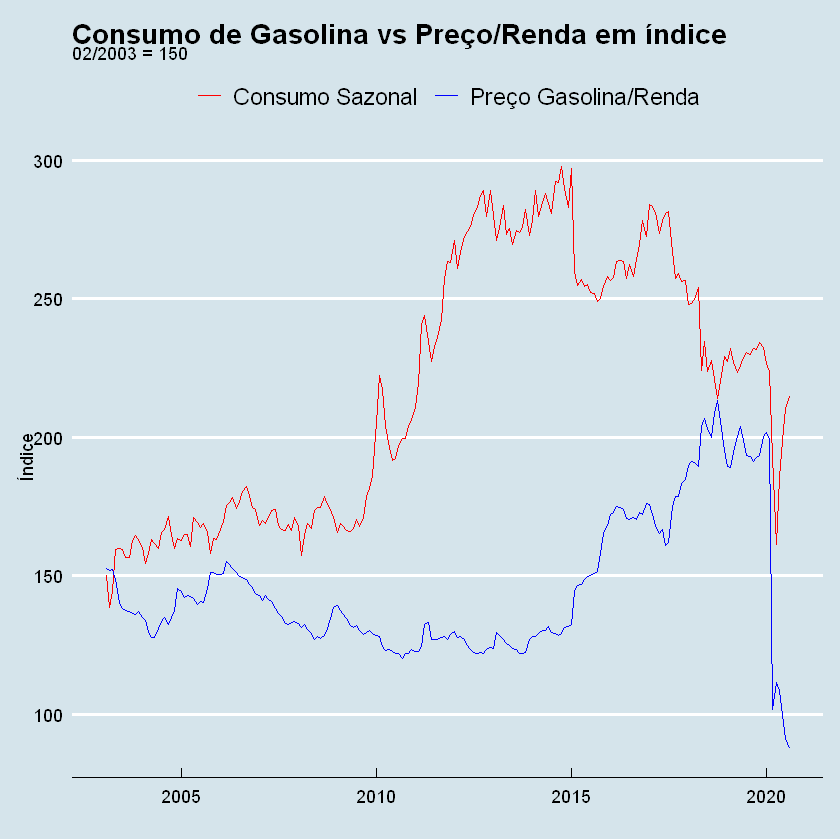

In [9]:
ggplot(consumo_preco, aes(Data))+
  geom_line(aes(y = Consumo, col = "Consumo Sazonal"))+
  geom_line(aes(y = Preco_Renda, col ="Preço Gasolina/Renda"))+
  labs(x = "", y = "Índice", title = "Consumo de Gasolina vs Preço/Renda em índice",
       subtitle = "02/2003 = 150")+
  scale_colour_manual("", values = c("Consumo Sazonal" = "red",
                                     "Preço Gasolina/Renda" = "blue"))+
  theme_economist()

In [10]:
consumo2 <- data.frame(Data = gasolina$date,
                            Consumo = gaso_seas1$Consumo*100000/pop,
                            Preco_Renda = preco_renda*100000/pop,
                            Consumo_Alcool = alcool_saz1*100000/pop)

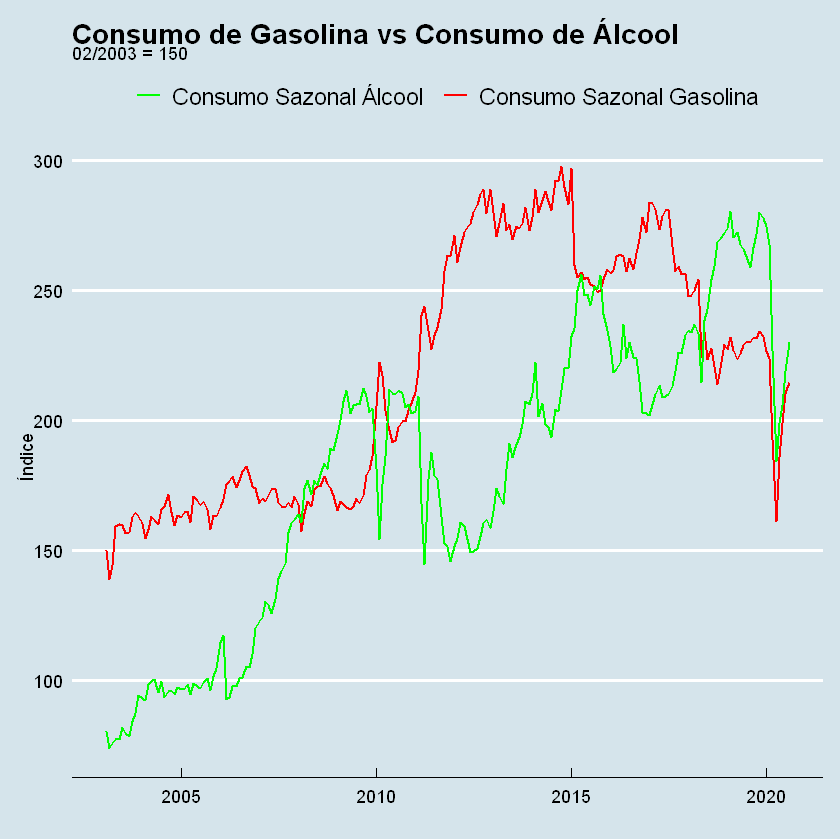

In [11]:
ggplot(consumo2, aes(Data))+
  geom_line(aes(y = Consumo, col = "Consumo Sazonal Gasolina"), size = 0.7)+
  geom_line(aes(y = Consumo_Alcool, col = "Consumo Sazonal Álcool"), size = 0.7)+
  labs(x = "", y = "Índice", title = "Consumo de Gasolina vs Consumo de Álcool",
       subtitle = "02/2003 = 150")+
  scale_colour_manual("", values = c("Consumo Sazonal Gasolina" = "red",
                                     "Consumo Sazonal Álcool" = "green"))+
  theme_economist()

In [12]:
summary(alcool_saz)


Call:
seas(x = ts(alcool$Consumo, start = c(2003, 2), frequency = 12))

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
Mon             0.008127   0.004356   1.866   0.0621 .  
Tue             0.004531   0.004467   1.014   0.3104    
Wed             0.001585   0.004428   0.358   0.7204    
Thu             0.009657   0.004500   2.146   0.0319 *  
Fri             0.011079   0.004402   2.517   0.0118 *  
Sat            -0.003075   0.004407  -0.698   0.4854    
LS2006.Mar     -0.246409   0.039446  -6.247 4.19e-10 ***
AO2010.Feb     -0.146809   0.027749  -5.291 1.22e-07 ***
LS2011.Mar     -0.228583   0.039197  -5.832 5.49e-09 ***
AO2011.Apr     -0.177996   0.028309  -6.288 3.23e-10 ***
AO2020.Mar     -0.174603   0.040127  -4.351 1.35e-05 ***
LS2020.Apr     -0.391999   0.055985  -7.002 2.53e-12 ***
MA-Seasonal-12  0.930461   0.036328  25.613  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

SEATS adj.  ARIMA: (0 1 0)(0 1 1)  Obs.: 211  T

In [13]:
summary(gaso_seas)


Call:
seas(x = ts(gasolina$Consumo, start = c(2003, 2), frequency = 12))

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
Mon             0.0085713  0.0033167   2.584  0.00976 ** 
Tue             0.0070628  0.0033892   2.084  0.03717 *  
Wed             0.0006286  0.0032920   0.191  0.84857    
Thu             0.0049648  0.0033338   1.489  0.13642    
Fri             0.0142816  0.0033045   4.322 1.55e-05 ***
Sat            -0.0014181  0.0032845  -0.432  0.66592    
Easter[15]      0.0256928  0.0068840   3.732  0.00019 ***
LS2015.Feb     -0.1379271  0.0292043  -4.723 2.33e-06 ***
LS2018.May     -0.1296458  0.0296716  -4.369 1.25e-05 ***
LS2020.Mar     -0.1529800  0.0296025  -5.168 2.37e-07 ***
AO2020.Apr     -0.1603849  0.0212497  -7.548 4.43e-14 ***
MA-Seasonal-12  0.9978518  0.0396842  25.145  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

SEATS adj.  ARIMA: (0 1 0)(0 1 1)  Obs.: 211  Transform: log
AICc:  1609, BIC:  1649  QS 